# Differential Equations | Building a Model from Scratch  | Module 1.2

## Introduction to Notebook

Welcome to the Jupyter Notebook that accompanies the YouTube module [Differential Equations | Building a Model from Scratch| Module 1.2](https://www.youtube.com/watch?v=6E-PMGWGCgk&t=24s). This notebook serves as a comprehensive guide, detailing the code and methodologies used to create the visualisations showcased in the video.

As you navigate through this notebook, you'll find:

- **Detailed Code Blocks:** Each section contains the Python code used to generate specific visualisations. This allows for a deeper dive into the technical aspects, ensuring transparency and reproducibility.

- **Explanatory Comments:** Alongside the code, we've included comments to clarify the purpose and functionality of each code segment. This ensures that even those new to Python or data visualisation can follow along with ease.

- **Interactive Elements:** One of the strengths of Jupyter Notebooks is interactivity. As you progress, feel free to modify and run code cells to see how changes impact the visualisations. It's a hands-on way to learn and explore!

The goal is to provide a seamless bridge between the visual and narrative content of the YouTube video and the underlying code that powers those visuals. It is hoped that this will help expedite your learning. Whether you're here to replicate our results, understand our methods, or simply learn, we hope this notebook proves to be a valuable resource.

Happy exploring!

### Code for Visualisation

1. **Import necessary libraries and modules**
    - `import numpy as np`: Imports the NumPy library, which provides support for working with arrays and matrices, as well as a collection of mathematical functions to operate on these arrays.
    - `import matplotlib.pyplot as plt`: Imports the plotting module from the Matplotlib library. This module provides functions to create various plots and customize their appearance.
    - `from scipy.integrate import odeint`: Imports the `odeint` function from the `scipy.integrate` module. This function allows for the integration of ordinary differential equations.
    - `from matplotlib.patches import FancyArrowPatch`: Imports the `FancyArrowPatch` class from Matplotlib, which is used to create customizable arrow annotations in the plot.

2. **Define the logistic growth differential equation**
    - `def logistic_growth(P, t, k, L)`: This function defines the logistic growth differential equation. The equation models how the size of a population \( P \) changes over time \( t \), with growth rate \( k \) and carrying capacity \( L \).

3. **Define a function to add arrows to the solution curves in reverse direction**
    - `def add_arrow_to_line2D_reverse(...)`: This custom function adds arrows to a plotted line in the reverse direction. It takes in parameters like the axes, the line, the locations where arrows should be placed, the style and size of the arrows, and adds the arrow annotations to the plot.

4. **Specify the initial conditions and their corresponding colors**
    - `t_fine = np.linspace(0, 100, 400)`: Generates an array of 400 evenly spaced values between 0 and 100. This array represents the time values for which the differential equation will be solved.
    - `initial_conditions = [100, 1000, 1500]`: List of initial conditions for the population size.
    - `colors = [...]`: List of colors corresponding to each initial condition to be used when plotting the solution curves.

5. **Set up the plot and its appearance**
    - `plt.figure(...)`: Initializes a new figure with a specified size and background color.
    - `ax = plt.gca()`: Gets the current axes instance on the current figure.

6. **Plot each solution curve for the given initial conditions and add arrows to indicate direction**
    - `for i, y0 in enumerate(initial_conditions)`: Iterates through each initial condition in the list.
    - `odeint(...)`: Solves the differential equation for the given initial condition.
    - `ax.plot(...)`: Plots the solution curve on the current axes.
    - `add_arrow_to_line2D_reverse(...)`: Calls the custom function to add arrows to the plotted solution curve.

7. **Add title, labels, and legend to the plot**
    - `plt.title(...)`: Sets the title for the plot.
    - `plt.xlabel(...)`, `plt.ylabel(...)`: Sets the labels for the x and y axes.
    - `plt.legend()`: Adds a legend to the plot.

8. **Customize the plot's appearance and display**
    - Various commands adjust the appearance of the plot, such as setting the background color, customizing the spines and tick marks, and turning off the grid.
    - `plt.show()`: Displays the finalized plot.


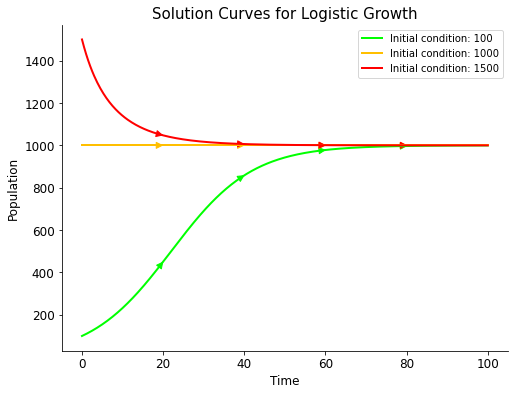

In [5]:
'''
This code visualizes the logistic growth of a population using solution curves.

1. Import necessary libraries and modules.
2. Define the logistic growth differential equation.
3. Define a function to add arrows to the solution curves in reverse direction.
4. Specify the initial conditions and their corresponding colors.
5. Set up the plot and its appearance.
6. Plot each solution curve for the given initial conditions and add arrows to indicate direction.
7. Add title, labels, and legend to the plot.
8. Display the plot.
'''

# 1. Import necessary libraries and modules.
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.patches import FancyArrowPatch

# 2. Define the logistic growth differential equation.
def logistic_growth(P, t, k, L):
    """Logistic growth differential equation."""
    return k * P * (1 - P/L)

# 3. Define a function to add arrows to the solution curves in reverse direction.
def add_arrow_to_line2D_reverse(axes, line, arrow_locs=[0.2, 0.4, 0.6, 0.8], arrowstyle='-|>', arrowsize=1):
    """
    Add arrows to a Line2D in reverse direction at selected locations.
    
    Parameters:
        axes (Axes object): The matplotlib axes where the arrows will be added.
        line (Line2D object): The line on which the arrows will be placed.
        arrow_locs (list): List of relative positions along the line where arrows should be placed. 
                           Values range from 0 to 1.
        arrowstyle (str): The style of the arrow to be added.
        arrowsize (float): The size of the arrow to be added.
        
    Returns:
        None. Arrows are added to the line on the specified axes.
    """
    
    # Extract x and y data from the line
    x, y = line.get_xdata(), line.get_ydata()
    
    # Iterate through each specified arrow location
    for loc in arrow_locs:
        # Calculate the index corresponding to the relative position along the line
        n = int(len(x) * loc)
        
        # Create an arrow patch pointing in the reverse direction of the line at the specified location
        arrow = FancyArrowPatch(posA=(x[n-1], y[n-1]), posB=(x[n], y[n]),
                                arrowstyle=arrowstyle, mutation_scale=arrowsize,
                                color=line.get_color())
        
        # Add the arrow patch to the axes
        axes.add_patch(arrow)

# 4. Specify the initial conditions and their corresponding colors.
t_fine = np.linspace(0, 100, 400)
initial_conditions = [100, 1000, 1500]
colors = [(0.0, 1.0, 0.0), (1.0, 0.75, 0.0), 'red']

# 5. Set up the plot and its appearance.
plt.figure(figsize=(8, 6), facecolor='white')
ax = plt.gca()

# 6. Plot each solution curve for the given initial conditions and add arrows to indicate direction.

''' Loop through each initial condition specified in the list 'initial_conditions' '''
for i, y0 in enumerate(initial_conditions):
    
    # Solve the logistic growth differential equation for the given initial condition `y0` 
    # using the `odeint` function from scipy's integrate module
    y_sol = odeint(logistic_growth, y0, t_fine, args=(0.1, 1000))
    
    # Plot the solution curve on the axes `ax` using the corresponding color from the 'colors' list
    # The label for each curve is set to its initial condition
    line, = ax.plot(t_fine, y_sol, color=colors[i], linewidth=2, label=f"Initial condition: {y0}")
    
    # Add arrows to the plotted solution curve to indicate the direction of the curve's movement
    # The arrows are placed in the reverse direction along the curve using the custom function 
    # `add_arrow_to_line2D_reverse` with a specified arrow size
    add_arrow_to_line2D_reverse(ax, line, arrowsize=15)


# 7. Add title, labels, and legend to the plot.
plt.title("Solution Curves for Logistic Growth", color="black", fontsize=15)
plt.xlabel("Time", color="black", fontsize=12)
plt.ylabel("Population", color="black", fontsize=12)
plt.legend()

# Customizing the graph appearance
plt.gca().set_facecolor('white')
plt.gca().spines['left'].set_color('black')
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().tick_params(axis='x', colors='black', labelsize=12)
plt.gca().tick_params(axis='y', colors='black', labelsize=12)
plt.grid(False)

# 8. Display the plot.
plt.show()